In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datum = pd.read_csv('train.csv')
test_datum = pd.read_csv('test.csv')
datum.index

RangeIndex(start=0, stop=891, step=1)

In [3]:
datum.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
datum.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
datum.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
datum.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
datum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Text(0, 0.5, 'passenger number')

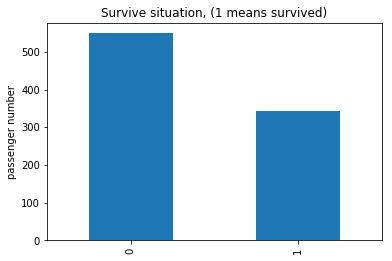

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

datum.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title('Survive situation, (1 means survived)') # 标题
plt.ylabel('passenger number')

Text(0, 0.5, 'passenger number')

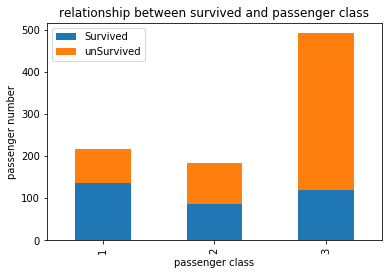

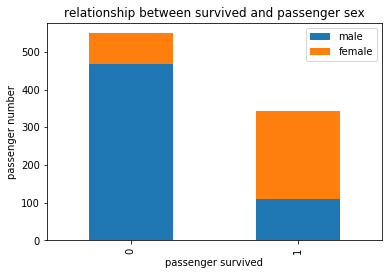

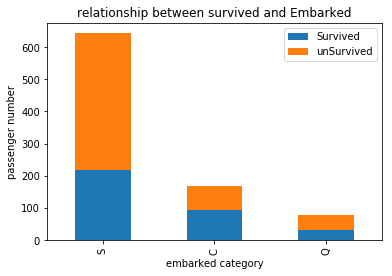

In [9]:
Survived_0 = datum.Pclass[datum.Survived == 0].value_counts()
Survived_1 = datum.Pclass[datum.Survived == 1].value_counts()
df1 = pd.DataFrame({'Survived': Survived_1, 'unSurvived': Survived_0})
df1.plot(kind='bar', stacked=True)
plt.title('relationship between survived and passenger class')
plt.xlabel('passenger class')
plt.ylabel('passenger number')

Survived_m = datum.Survived[datum.Sex == 'male'].value_counts()
Survived_f = datum.Survived[datum.Sex == 'female'].value_counts()
df1 = pd.DataFrame({'male': Survived_m, 'female': Survived_f})
df1.plot(kind='bar', stacked=True)
plt.title('relationship between survived and passenger sex')
plt.xlabel('passenger survived')
plt.ylabel('passenger number')

Embarked_S = datum.Embarked[datum.Survived == 1].value_counts()
Embarked_U = datum.Embarked[datum.Survived == 0].value_counts()
df2 = pd.DataFrame({'Survived': Embarked_S, 'unSurvived': Embarked_U})
df2.plot(kind='bar', stacked=True)
plt.title('relationship between survived and Embarked')
plt.xlabel('embarked category')
plt.ylabel('passenger number')

有无兄弟姐妹与存活率的关系

Text(0.5, 0, 'noparch')

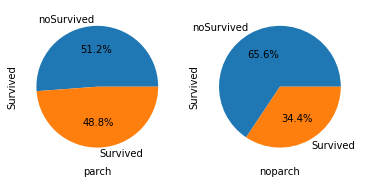

In [10]:
plt.subplot(1,2,1)
parch = datum[datum.Parch != 0]
noparch = datum[datum.Parch == 0]
parch['Survived'].value_counts().plot.pie(labels=['noSurvived','Survived'], 
                                          autopct='%1.1f%%')
plt.xlabel('parch')
plt.subplot(1,2,2)
noparch['Survived'].value_counts().plot.pie(labels=['noSurvived','Survived'],
                                           autopct="%1.1f%%")
plt.xlabel('noparch')

亲友人数与存活率的关系

Text(0.5, 1.0, 'sibsp and survived')

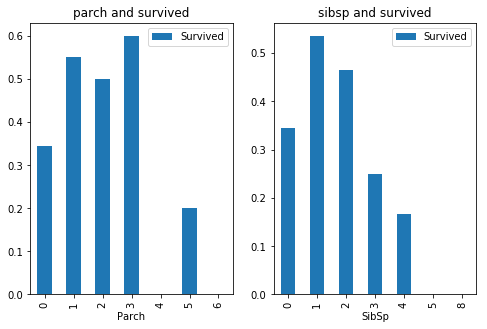

In [11]:
fig, ax = plt.subplots(1,2,figsize=(8,5))
datum[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('parch and survived')
datum[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('sibsp and survived')

单独观察Parch和SibSp对生存率影响不大，但通过构造家族成员数，可以发现其对生存率有一定的影响，成员数过高或过低均会使生存率降低。

In [12]:
new_datum = datum.copy()

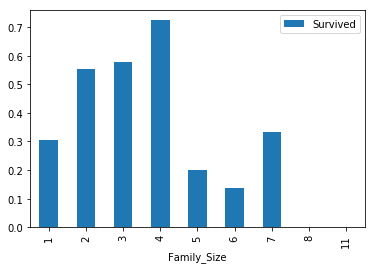

In [13]:
new_datum['Family_Size'] = datum['Parch'] + datum['SibSp'] + 1
new_datum[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()

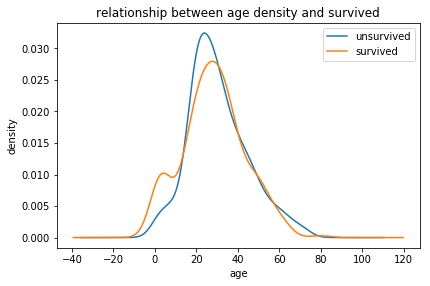

In [14]:
datum.Age[datum.Survived == 0].plot(kind='kde')   
datum.Age[datum.Survived == 1].plot(kind='kde')
plt.xlabel('age') 
plt.ylabel("density") 
plt.title('relationship between age density and survived')
plt.legend(('unsurvived', 'survived'),loc='best') # sets our legend for our graph.
plt.tight_layout(pad=0.8, w_pad=2.5, h_pad=1.0)

### Baseline: first only choose values with high correlation as the features and modeling to make a baseline  
Notice age, cabin, embarked have missing values, and cabin have 891-204/891 missing datum, age have less missing datum, embarked only have two missing datum.  
1. Neglect the missing datum and choose features

In [15]:
#查看相关性矩阵
corrDf = datum.corr() 
print(corrDf)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [16]:
print(corrDf['Survived'].sort_values(ascending =False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


From the correlation matrix, we can delete PassengerId, SibSp since they are close to zero (from the figure we have ploted about the relationship between age density and survived, we can find there is relationship with age).

In [17]:
sex_dummy = pd.get_dummies(datum.Sex, prefix='Sex')
pclass_dummy = pd.get_dummies(datum.Pclass, prefix='Pclass')
#print(sex_dummy.head())
#print(pclass_dummy.head())

In [18]:
new_datum.drop(['Sex', 'Pclass','PassengerId', 'Name', 'Age', 'SibSp', 'Ticket', 'Cabin', 
                'Embarked','Survived'], axis=1, inplace=True)
#print(new_datum.head())

In [19]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

scaler = preprocessing.StandardScaler().fit(new_datum)
new_datum = scaler.transform(new_datum)

/home/huzhj/anaconda3/envs/kaggle/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/huzhj/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [20]:
new_datum[:,0].shape

(891,)

In [21]:
new_datum = pd.DataFrame({'Parch': new_datum[:,0], 'Fare':new_datum[:,1]})
new_datum = pd.concat([new_datum, sex_dummy, pclass_dummy], axis=1)
print(new_datum.head())

      Parch      Fare  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3
0 -0.473674 -0.502445           0         1         0         0         1
1 -0.473674  0.786845           1         0         1         0         0
2 -0.473674 -0.488854           1         0         0         0         1
3 -0.473674  0.420730           1         0         1         0         0
4 -0.473674 -0.486337           0         1         0         0         1


In [22]:
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=200).fit(new_datum, datum.Survived)

In [23]:
y_pred = clf.predict(new_datum)

In [24]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
strKFold = StratifiedKFold(n_splits=3,shuffle=False,random_state=0)
scores = cross_val_score(clf, new_datum, datum.Survived, cv=strKFold)
print("straitified cross validation scores:{}".format(scores))
print("Mean score of straitified cross validation:{:.2f}".format(scores.mean()))

straitified cross validation scores:[0.77441077 0.77777778 0.77104377]
Mean score of straitified cross validation:0.77


The proprecess did not increase the performance.(Actually before proprecess, the cross validation is 0.78. :) )    
### 有些情况不需要进行特征的归一化：
  It depends on your ML algorithms, some methods requires almost no efforts to normalize features or handle both continuous and discrete features, like tree based methods: c4.5, Cart, random Forrest, bagging or boosting. But most of parametric models (generalized linear models, neural network, SVM,etc) or methods using distance metrics (KNN, kernels, etc) will require careful work to achieve good results. Standard approaches including binary all features, 0 mean unit variance all continuous features, etc.

https://yq.aliyun.com/articles/657187  
Mark：如果其它特征变量与缺失变量无关，则预测的结果毫无意义。如果预测结果相当准确，则又说明这个变量完全没有必要进行预测，因为这必然是与特征变量间存在重复信息。一般情况下，会介于两者之间效果为最好，若强行填补缺失值之后引入了自相关，这会给后续分析造成障碍。  
2. Filling the missing datum  
2.1 Since Embarked only has two missing datum, we can use mode to fill it. 

In [25]:
Embarked_dummy = datum.Embarked.copy()
print(Embarked_dummy.value_counts())
Embarked_dummy.fillna(datum.Embarked.mode()[0], inplace=True)
print(Embarked_dummy.value_counts())
Embarked_dummy = pd.get_dummies(Embarked_dummy, prefix='Embarked')
print(Embarked_dummy.head())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64
   Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1


In [26]:
new_datum = pd.concat([new_datum, Embarked_dummy], axis=1)
print(new_datum.head())

      Parch      Fare  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  \
0 -0.473674 -0.502445           0         1         0         0         1   
1 -0.473674  0.786845           1         0         1         0         0   
2 -0.473674 -0.488854           1         0         0         0         1   
3 -0.473674  0.420730           1         0         1         0         0   
4 -0.473674 -0.486337           0         1         0         0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1  


In [27]:
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=200).fit(new_datum, datum.Survived)
strKFold = StratifiedKFold(n_splits=3,shuffle=False,random_state=0)
scores = cross_val_score(clf, new_datum, datum.Survived, cv=strKFold)
print("straitified cross validation scores:{}".format(scores))
print("Mean score of straitified cross validation:{:.2f}".format(scores.mean()))

straitified cross validation scores:[0.76430976 0.79124579 0.77104377]
Mean score of straitified cross validation:0.78


Use random forest Regression to filling the missing datum ‘age’.  
当样本量较少时，max_depth, min_samples_split, min_samples_leaf  
如果特征不多时，max_leaf_nodes

In [28]:
from sklearn.ensemble import RandomForestRegressor
model_age = RandomForestRegressor(random_state=0, oob_score=True, n_estimators=1100,  max_features=7, 
                                  
                                  criterion='mae')

In [29]:
#from sklearn.ensemble import RandomForestRegressor
#model_age = RandomForestRegressor(random_state=0, oob_score=True, n_estimators=1000,  max_features=7, 
#                                  max_depth=5, min_samples_split=10,
#                                  criterion='mae')

In [30]:
new_datum = pd.concat([datum.Age, new_datum], axis=1)
Age_test = new_datum.loc[datum.Age.isnull()]
Age_train = new_datum.loc[datum.Age.notnull()]

In [31]:
import numpy as np
model_age.fit(Age_train.values[:,1:], Age_train.Age)
Age_train_pred = np.round( model_age.predict(Age_train.values[:,1:]) )
print((Age_train_pred==Age_train.Age).sum()/Age_train.shape[0])
#age_scores = cross_val_score(clf, Age_train, Age_train.Age, cv=strKFold)
#print("straitified cross validation scores:{}".format(age_scores))
#print("Mean score of straitified cross validation:{:.2f}".format(age_scores.mean()))

0.06022408963585434


In [32]:
#from sklearn.model_selection import GridSearchCV
#param_test1 = {'n_estimators':range(800,1500,100),
#              'max_depth':range(3,14,2), 
#              'min_samples_split':range(2, 23, 4),
#              'max_features': range(2, 11, 2)}
#gsearch1 = GridSearchCV(estimator = RandomForestRegressor(random_state=0, oob_score=True,
#                                                         criterion='mae'), 
#                       param_grid = param_test1, cv=3, n_jobs=-1)
#gsearch1.fit(Age_train.values[:,1:], Age_train.Age)
#gsearch1.best_params_, gsearch1.best_score_

In [33]:
#Age_train.describe()
#print(np.sqrt(10))
#for i in range(2,11,2):
#    print(i)
#fillage.shape

In [34]:
fillage = model_age.predict(Age_test.values[:,1:])

In [35]:
new_datum.loc[(new_datum.Age.isnull()), 'Age'] = np.round(fillage)

In [36]:
scores = cross_val_score(clf, new_datum, datum.Survived, cv=strKFold)
print("straitified cross validation scores:{}".format(scores))
print("Mean score of straitified cross validation:{:.2f}".format(scores.mean()))

straitified cross validation scores:[0.78114478 0.78451178 0.79124579]
Mean score of straitified cross validation:0.79


### 提取名字中的信息

In [37]:
import re
new_datum['Name_Title'] = datum['Name'].map(lambda x: 
                                            re.compile(", (.*?)\.").findall(x)[0])
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
new_datum['Name_Title'] = new_datum['Name_Title'].map(title_Dict)
dummies_title = pd.get_dummies(new_datum['Name_Title'], prefix="Name_Title")
new_datum = pd.concat([new_datum,dummies_title], axis=1)
new_datum.drop(['Name_Title'], axis=1, inplace=True)

In [38]:
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=500).fit(new_datum, datum.Survived)
scores = cross_val_score(clf, new_datum, datum.Survived, cv=strKFold)
print("straitified cross validation scores:{}".format(scores))
print("Mean score of straitified cross validation:{:.2f}".format(scores.mean()))

straitified cross validation scores:[0.78787879 0.82828283 0.80808081]
Mean score of straitified cross validation:0.81


/home/huzhj/anaconda3/envs/kaggle/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


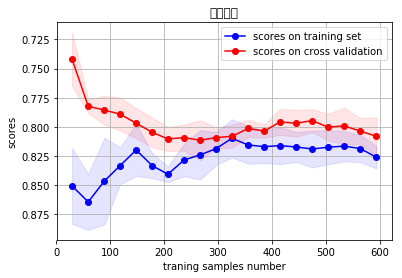

(0.8136393865377909, 0.04410691775953046)

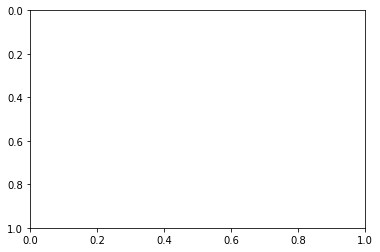

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        #plt.xlabel(u"训练样本数")
        #plt.ylabel(u"得分")
        plt.xlabel("traning samples number")
        plt.ylabel('scores')
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="scores on training set")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="scores on cross validation")

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线", new_datum, datum.Survived)


### 测试集

In [40]:
test_datum = pd.read_csv("test.csv")
test_datum.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
test_datum.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [42]:
test_datum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [43]:
test_datum.index

RangeIndex(start=0, stop=418, step=1)

In [44]:
df = test_datum.copy()
df.drop(['Sex', 'Pclass','PassengerId', 'Name', 'Age', 'SibSp', 'Ticket', 'Cabin', 
                'Embarked'], axis=1, inplace=True)

In [45]:
#df = scaler.transform(df)

In [46]:
#df = pd.DataFrame({'Parch': df[:,0], 'Fare':df[:,1]})
df_sex_dummy = pd.get_dummies(test_datum.Sex, prefix='Sex')
df_pclass_dummy = pd.get_dummies(test_datum.Pclass, prefix='Pclass')
df_embarked_dummy = pd.get_dummies(test_datum.Embarked, prefix='Embarked')
df = pd.concat([df, df_sex_dummy, df_pclass_dummy, df_embarked_dummy], axis=1)
df.head()

,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,7.8292,0,1,0,0,1,0,1,0
1,0,7.0000,1,0,0,0,1,0,0,1
2,0,9.6875,0,1,0,1,0,0,1,0
3,0,8.6625,0,1,0,0,1,0,0,1
4,1,12.2875,1,0,0,0,1,0,0,1


In [47]:
df = pd.concat([test_datum.Age, df], axis=1)
df_Age_test = df.loc[df.Age.isnull()]

In [48]:
df_fillage = model_age.predict(df_Age_test.values[:,1:])
df.loc[(df.Age.isnull()), 'Age'] = np.round(df_fillage)
df.head()

,Age,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,7.8292,0,1,0,0,1,0,1,0
1,47.0,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,12.2875,1,0,0,0,1,0,0,1


In [49]:
df['Name_Title'] = test_datum['Name'].map(lambda x: 
                                            re.compile(", (.*?)\.").findall(x)[0])
df['Name_Title'] = df['Name_Title'].map(title_Dict)
df_title_dummies = pd.get_dummies(df['Name_Title'], prefix='Name_Title')
df = pd.concat([df,df_title_dummies], axis=1)
df.drop(['Name_Title'], axis=1, inplace=True)

In [50]:
df.Fare.fillna(df.Fare.mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
Age                   418 non-null float64
Parch                 418 non-null int64
Fare                  418 non-null float64
Sex_female            418 non-null uint8
Sex_male              418 non-null uint8
Pclass_1              418 non-null uint8
Pclass_2              418 non-null uint8
Pclass_3              418 non-null uint8
Embarked_C            418 non-null uint8
Embarked_Q            418 non-null uint8
Embarked_S            418 non-null uint8
Name_Title_Master     418 non-null uint8
Name_Title_Miss       418 non-null uint8
Name_Title_Mr         418 non-null uint8
Name_Title_Mrs        418 non-null uint8
Name_Title_Officer    418 non-null uint8
Name_Title_Royalty    418 non-null uint8
dtypes: float64(2), int64(1), uint8(14)
memory usage: 15.6 KB


In [51]:
df_survived = clf.predict(df)

In [52]:
result = pd.DataFrame({'PassengerId':test_datum['PassengerId'].as_matrix(), 
                       'Survived':df_survived.astype(np.int32)})
result.to_csv("result.csv", index=False)

/home/huzhj/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


在baseline中，提交的代码（测试集）中跑了0.77的正确率。  
以上仅是对类别变量做哑变量处理，对Age用随机森林进行了补全。忽略了Parch,Sibsp变量的影响，且对Fare的处理太过粗糙；在模型选择上只是用了逻辑回归跑了结果。接下来进行特征工程及模型优化调参。

### 特征工程

In [53]:
test_datum["Survived"] = 0
combine_train_test = datum.append(test_datum,sort=False)

#### (1) Embarked, Sex
同上，Embarked 用众数补全，Sex哑变量处理  

In [54]:
combine_train_test.Embarked.fillna(combine_train_test.Embarked.mode().iloc[0], inplace=True)
combine_train_test["Embarked"] = pd.factorize(combine_train_test.Embarked)[0]

In [55]:
combine_train_test["Sex"] = pd.factorize(combine_train_test.Sex)[0]

#### (2) Name
Name 中包含了性别，年龄信息；仔细思考，可能还会有些贵族姓氏，即包含身份地位信息，如：Dr,、Lady、Major、Master等的称呼。身份尊贵的人可能生存率高些。观察不同称呼对生存率的影响。

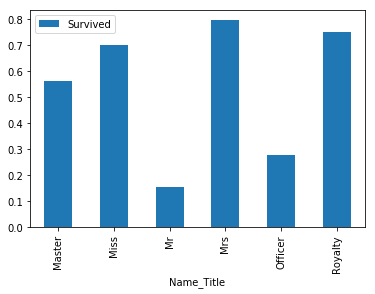

In [56]:
new_datum['Name_Title'] = datum['Name'].map(lambda x: 
                                            re.compile(", (.*?)\.").findall(x)[0])
new_datum['Name_Title'] = new_datum['Name_Title'].map(title_Dict)
new_datum = pd.concat([datum.Survived, new_datum], axis=1)
new_datum[['Name_Title', 'Survived']].groupby(['Name_Title']).mean().plot.bar()

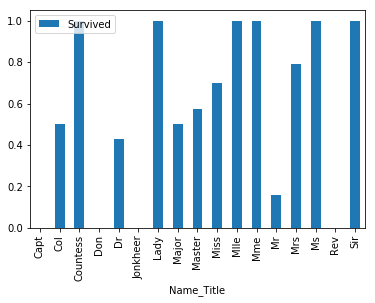

In [57]:
new_datum_1 = new_datum.copy()
new_datum_1.drop(['Name_Title_Master','Name_Title_Miss','Name_Title_Mr', 'Name_Title_Mrs',
                 'Name_Title_Officer','Name_Title_Royalty','Name_Title'], axis=1,
                 inplace=True)
new_datum_1 = pd.concat([new_datum_1, datum['Name']], axis=1)
new_datum_1['Name_Title'] = new_datum_1['Name'].str.extract('([a-zA-Z]+)\.', expand=False)
new_datum_1[['Name_Title','Survived']].groupby(['Name_Title']).mean().plot.bar()

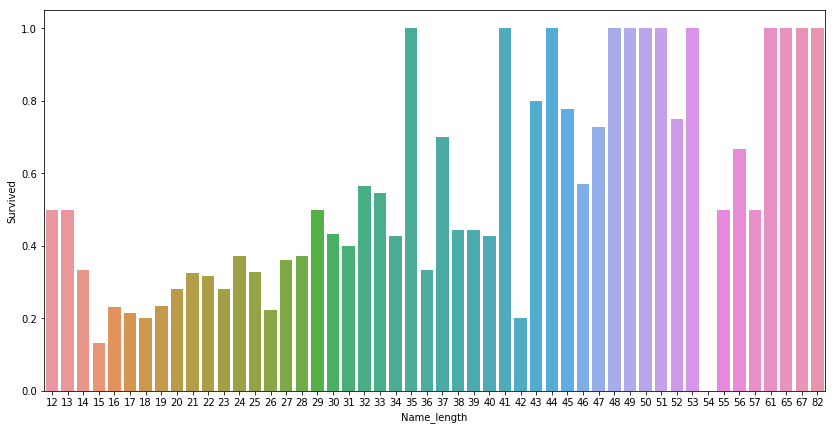

In [58]:
# 名字长度与生存率关系
import seaborn as sns
plt.figure(figsize=(14,7))
new_datum_1['Name_length'] = new_datum_1['Name'].apply(len)
name_length = new_datum_1[['Name_length','Survived']].groupby(['Name_length'], 
                                                              as_index=False).mean()
sns.barplot(x='Name_length', y='Survived',data=name_length)
new_datum_1.drop(['Name'],axis=1,inplace=True)

In [59]:
combine_train_test['Name_Title'] = combine_train_test['Name'].str.extract('([a-zA-Z]+)\.', 
                                                                          expand=False)
#combine_train_test['Name_Title'] = combine_train_test['Name'].map(lambda x: 
#                                            re.compile(", (.*?)\.").findall(x)[0])
combine_train_test['Name_Title'] = combine_train_test['Name_Title'].map(title_Dict)
combine_nametitle_dummy = pd.get_dummies(combine_train_test['Name_Title'], 
                                                  prefix='Name_Title')
combine_train_test = pd.concat([combine_train_test, combine_nametitle_dummy], axis=1)

In [60]:
combine_train_test["Name_Title"] = pd.factorize(combine_train_test.Name_Title)[0]

#### (3) Parch and Sibsp  构成新的特征 Familt_Size_Category  
由前面的分析可知，家庭成员的个数对生存率有一定的影响，过低或过高都会影响生存率。故可将Family_Size分为三类。  
将离散型特征进行one-hot编码的作用，是为了让距离计算更合理，但如果特征是离散的，并且不用one-hot编码就可以很合理的计算出距离，那么就没必要进行one-hot编码。

In [61]:
def family_size_category(family_size):
    if family_size <= 1:
        return "Single"
    elif family_size <= 4:
        return "Small"
    else:
        return "Large"

new_datum['Family_Size'] = datum['Parch'] + datum['SibSp'] + 1
new_datum["Family_Size_Category"] = new_datum["Family_Size"].map(family_size_category)
family_size_dummies_df = pd.get_dummies(new_datum['Family_Size_Category'],
                             prefix=new_datum[['Family_Size_Category']].columns[0])
new_datum = pd.concat([new_datum, family_size_dummies_df], axis=1)
new_datum.head()

,Survived,Age,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Name_Title_Mr,Name_Title_Mrs,Name_Title_Officer,Name_Title_Royalty,Name_Title,Family_Size,Family_Size_Category,Family_Size_Category_Large,Family_Size_Category_Single,Family_Size_Category_Small
0,0,22.0,-0.473674,-0.502445,0,1,0,0,1,0,...,1,0,0,0,Mr,2,Small,0,0,1
1,1,38.0,-0.473674,0.786845,1,0,1,0,0,1,...,0,1,0,0,Mrs,2,Small,0,0,1
2,1,26.0,-0.473674,-0.488854,1,0,0,0,1,0,...,0,0,0,0,Miss,1,Single,0,1,0
3,1,35.0,-0.473674,0.420730,1,0,1,0,0,0,...,0,1,0,0,Mrs,2,Small,0,0,1
4,0,35.0,-0.473674,-0.486337,0,1,0,0,1,0,...,1,0,0,0,Mr,1,Single,0,1,0


In [62]:
combine_train_test['Family_Size'] = combine_train_test['Parch'] + combine_train_test['SibSp'] + 1
combine_train_test["Family_Size_Category"] = combine_train_test["Family_Size"].map(family_size_category)
family_size_dummies_df = pd.get_dummies(combine_train_test['Family_Size_Category'],
                             prefix=combine_train_test[['Family_Size_Category']].columns[0])
combine_train_test = pd.concat([combine_train_test, family_size_dummies_df], axis=1)
combine_train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Officer,Name_Title_Royalty,Family_Size,Family_Size_Category,Family_Size_Category_Large,Family_Size_Category_Single,Family_Size_Category_Small
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,2,Small,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,2,Small,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,0,1,Single,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,0,1,0,0,2,Small,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,1,0,0,0,1,Single,0,1,0


In [63]:
combine_train_test["Family_Size_Category"] = pd.factorize(combine_train_test.Family_Size_Category)[0]

#### (4) Ticket  
观察Ticket的值，我们可以看到，Ticket有字母和数字之分，而对于不同的字母，可能在很大程度上就意味着船舱等级或者不同船舱的位置，也会对Survived产生一定的影响，所以我们将Ticket中的字母分开，为数字的部分则分为一类。

In [64]:
new_datum["Ticket_Letter"] = datum["Ticket"].str.split().str[0]
new_datum["Ticket_Letter"] = new_datum["Ticket_Letter"].apply(
    lambda x : "U0" if x.isnumeric() else x)
new_datum["Ticket_Letter"] = pd.factorize(new_datum["Ticket_Letter"])[0]

In [65]:
combine_train_test["Ticket_Letter"] = combine_train_test["Ticket"].str.split().str[0]
combine_train_test["Ticket_Letter"] = combine_train_test["Ticket_Letter"].apply(
    lambda x : "U0" if x.isnumeric() else x)
combine_train_test["Ticket_Letter"] = pd.factorize(combine_train_test["Ticket_Letter"])[0]

#### <font color=red > 离散变量的编码方法： </font>
1. pd.get_dummies 哑变量
2. from sklearn.preprocessing import LabelEncoder  
   le = LabelEncoder()   
   le.fit(np.array(["Single", "Small", "Large"]))  
   new_datum["Family_Size_Category"] = le.transform(new_datum["Family_Size_Category"]) 
3. pd.factorize

#### (5) Cabin  
cabin 缺失值很多，有效值只有204个，可以直接丢弃；也可以对其进行分析，看是否有必要将缺失值作为一个类别进行处理。

 <font color=red > 对object，缺失值用 np.nan 而不是 np.isnull() </font>

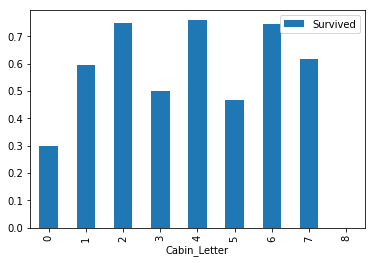

In [66]:
# 查看不同船舱对生存率的影响
new_datum["Cabin_Letter"] = datum["Cabin"].str.extract('([a-zA-Z]+)', expand=False)
new_datum["Cabin_Letter"] = new_datum["Cabin_Letter"].apply(
    lambda x: "U0" if x is np.nan else x)
new_datum["Cabin_Letter"] = pd.factorize(new_datum.Cabin_Letter)[0]
new_datum[["Cabin_Letter", "Survived"]].groupby("Cabin_Letter").mean().plot.bar()

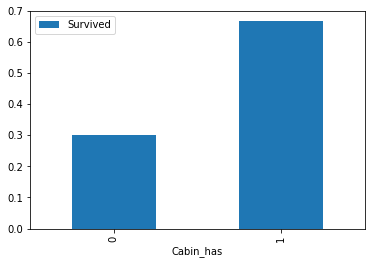

In [67]:
new_datum.drop(["Cabin_Letter"], axis=1, inplace=True)
new_datum.loc[datum.Cabin.isnull(), "Cabin_has"] = "U0"
new_datum["Cabin_has"] = new_datum["Cabin_has"].apply(lambda x : 0 if x =="U0" else 1)
new_datum[["Cabin_has", "Survived"]].groupby(["Cabin_has"]).mean().plot.bar()

In [68]:
combine_train_test.loc[combine_train_test.Cabin.isnull(), "Cabin_has"] = "U0"
combine_train_test["Cabin_has"] = combine_train_test["Cabin_has"].apply(lambda x : 0 if x =="U0" else 1)

由此可见，Cabin的种类对生存率的影响不是很大，但是是否含有Cabin对生存率有一定的影响。

#### （6）Pclass 和  Fare  
Pclass这一项，可以不用直接处理，直接转化为哑变量。  
也可做如下假设：在不同等级的船舱，内部的不同票价也反应了各等级仓的位置，也可能与逃生的顺序有关。所以这里分出各等级仓的高价位与低价位。

In [69]:
def pclass_fare_category(df, pclass1_mean_fare, pclass2_mean_fare, pclass3_mean_fare):
    if df["Pclass"] == 1:
        if df["Fare"] <= pclass1_mean_fare:
            return "Pclass1_Lowfare"
        else:
            return "Pclass1_Highfare"
    elif df["Pclass"] == 2:
        if df["Fare"] <= pclass2_mean_fare:
            return "Pclass2_Lowfare"
        else:
            return "Pclass2_Highfare"
    elif df["Pclass"] == 3:
        if df["Fare"] <= pclass3_mean_fare:
            return "Pclass3_Lowfare"
        else:
            return "Pclass3_Highfare"
        
pclass1_mean_fare = datum[["Fare","Pclass"]].groupby(["Pclass"]).mean().get_values()[0]
pclass2_mean_fare = datum[["Fare","Pclass"]].groupby(["Pclass"]).mean().get_values()[1]
pclass3_mean_fare = datum[["Fare","Pclass"]].groupby(["Pclass"]).mean().get_values()[2]

new_datum["Pclass_Fare_Category"] = datum.apply(pclass_fare_category, args=(
    pclass1_mean_fare[0], pclass2_mean_fare[0], pclass3_mean_fare[0]), axis=1)

# 删去最后一列（没有列名）
#new_datum.drop(new_datum.columns[len(new_datum.columns)-1], axis=1, inplace=True)

pclass_fare_category_dummy = pd.get_dummies(new_datum.Pclass_Fare_Category.rename(
    columns=lambda x: str(x)))
new_datum = pd.concat([new_datum, pclass_fare_category_dummy],axis=1)
new_datum.drop("Pclass_Fare_Category",inplace=True,axis=1)

接下来再对Fare进行Bining。（Binning通过观察“邻居”(即周围的值)将连续数据离散化。每个bin中含有的样本数相同）

In [70]:
new_datum["Fare_bin"] = pd.qcut(new_datum["Fare"], 5)
new_datum.Fare_bin.head()

0    (-0.649, -0.49]
1     (0.151, 9.667]
2    (-0.49, -0.437]
3     (0.151, 9.667]
4    (-0.49, -0.437]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.649, -0.49] < (-0.49, -0.437] < (-0.437, -0.212] < (-0.212, 0.151] < (0.151, 9.667]]

In [71]:
new_datum["Fare_bin_Category"] = pd.factorize(new_datum["Fare_bin"])[0]
new_datum.drop("Fare_bin", inplace=True, axis=1)

In [72]:
pclass1_mean_fare = combine_train_test[["Fare","Pclass"]].groupby(["Pclass"]).mean().get_values()[0]
pclass2_mean_fare = combine_train_test[["Fare","Pclass"]].groupby(["Pclass"]).mean().get_values()[1]
pclass3_mean_fare = combine_train_test[["Fare","Pclass"]].groupby(["Pclass"]).mean().get_values()[2]

combine_train_test["Pclass_Fare_Category"] = combine_train_test.apply(pclass_fare_category, args=(
    pclass1_mean_fare[0], pclass2_mean_fare[0], pclass3_mean_fare[0]), axis=1)

pclass_fare_category_dummy = pd.get_dummies(combine_train_test.Pclass_Fare_Category.rename(
    columns=lambda x: str(x)))
combine_train_test = pd.concat([combine_train_test, pclass_fare_category_dummy],axis=1)
combine_train_test.drop("Pclass_Fare_Category",inplace=True,axis=1)

通过对Ticket数据的分析，我们可以看到部分票号数据有重复，同时结合亲属人数及名字的数据，和票价船舱等级对比，我们可以知道购买的票中有家庭票和团体票，所以我们需要将团体票的票价分配到每个人的头上。

In [73]:
combine_train_test['Fare'] = combine_train_test[['Fare']].fillna(
                combine_train_test.groupby('Pclass').transform(np.mean))
combine_train_test['Group_Ticket'] = combine_train_test['Fare'].groupby(
                by=combine_train_test['Ticket']).transform('count')
combine_train_test['Fare'] = combine_train_test['Fare'] / combine_train_test['Group_Ticket']
combine_train_test.drop(['Group_Ticket'], axis=1, inplace=True)
combine_train_test["Fare_bin"] = pd.qcut(combine_train_test["Fare"], 5)
combine_train_test["Fare_bin_Category"] = pd.factorize(combine_train_test["Fare_bin"])[0]
combine_train_test.drop("Fare_bin", inplace=True, axis=1)

#### (7) Age

In [74]:
new_datum["Name_Length"] = new_datum_1.Name_length
combine_train_test['Name_length'] = combine_train_test['Name'].apply(len)

In [75]:
missing_age_df = pd.DataFrame(combine_train_test[[ "Age", "Embarked", "Sex", "Name_Title",
                                                 "Name_length", "Family_Size", 
                                                "Family_Size_Category", "Fare", 
                                                 "Fare_bin_Category", "Pclass"] ])
missing_age_train = missing_age_df.loc[missing_age_df.Age.notnull()]
missing_age_test = missing_age_df.loc[missing_age_df.Age.isnull()]

建立Age的预测模型，我们可以多模型预测，然后再做模型的融合，提高预测的精度。

In [76]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def fill_age_model(missing_age_train, missing_age_test):
    train_X = missing_age_train.drop(["Age"], axis=1)
    train_Y = missing_age_train.Age
    test_X = missing_age_test.drop(["Age"], axis=1)
    
    # model1
    gb_reg = GradientBoostingRegressor(random_state=0, criterion='mae')
    gb_reg_pram_grid = {"n_estimators":range(800,1400,200),
                       "min_samples_leaf":range(2,6,2),
                       }
    #gb_reg_pram_grid = {"n_estimators":[1000],
    #                   "min_samples_leaf":[2],
    #                   }
    gb_reg_grid = model_selection.GridSearchCV(estimator=gb_reg,
                                           param_grid=gb_reg_pram_grid,
                                           cv=3, n_jobs=-1,
                                           verbose=1, scoring='neg_mean_squared_error')
    gb_reg_grid.fit(train_X, train_Y)
    print("best parameter by gradient boosting in filling age is: " 
          + str(gb_reg_grid.best_params_))
    print("best stores by gradient boosting in filling age is: "
         + str(gb_reg_grid.best_score_))
    print("GB train error is: " + str(gb_reg_grid.score(train_X, train_Y)))
    missing_age_test.loc[:, "GB_Age"] = gb_reg_grid.predict(test_X)
    print(missing_age_test["GB_Age"][:4])
    
    # model2
    rf_reg = RandomForestRegressor(random_state=0, oob_score=True, n_estimators=1100,  
                                  max_features=7, criterion='mae')
    rf_reg.fit(train_X, train_Y)
    print("RF train error is: " + str(rf_reg.score(train_X, train_Y)) )
    missing_age_test.loc[:, "RF_Age"] = rf_reg.predict(test_X)
    print(missing_age_test["RF_Age"][:4])
    
    # model merge
    missing_age_test["Age"] = np.mean([ missing_age_test["GB_Age"], missing_age_test["RF_Age"] ])
    print("merge model")
    print(missing_age_test["Age"][:4])
    
    missing_age_test.drop(columns = ["GB_Age", "RF_Age"], axis=1, inplace=True)
    
    return missing_age_test

missing_age_test = fill_age_model(missing_age_train, missing_age_test)
combine_train_test.loc[(combine_train_test.Age.isnull()), 'Age'] = missing_age_test

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.2min finished
/home/huzhj/anaconda3/envs/kaggle/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter by gradient boosting in filling age is: {'min_samples_leaf': 4, 'n_estimators': 800}
best stores by gradient boosting in filling age is: -140.66829389124243
GB train error is: -81.41134019177723
5     27.973748
17    30.041259
19    29.154578
26    27.558281
Name: GB_Age, dtype: float64


/home/huzhj/anaconda3/envs/kaggle/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/huzhj/anaconda3/envs/kaggle/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


RF train error is: 0.8497180685687007
5     34.935682
17    30.027273
19    38.976136
26    27.066364
Name: RF_Age, dtype: float64
merge model
5     29.789411
17    29.789411
19    29.789411
26    29.789411
Name: Age, dtype: float64


/home/huzhj/anaconda3/envs/kaggle/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/huzhj/anaconda3/envs/kaggle/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/huzhj/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

### 特征间的相关性分析  
可以挑选一些主要特征，生成特征之间的关联图，查看特征与特征之间的相关性。

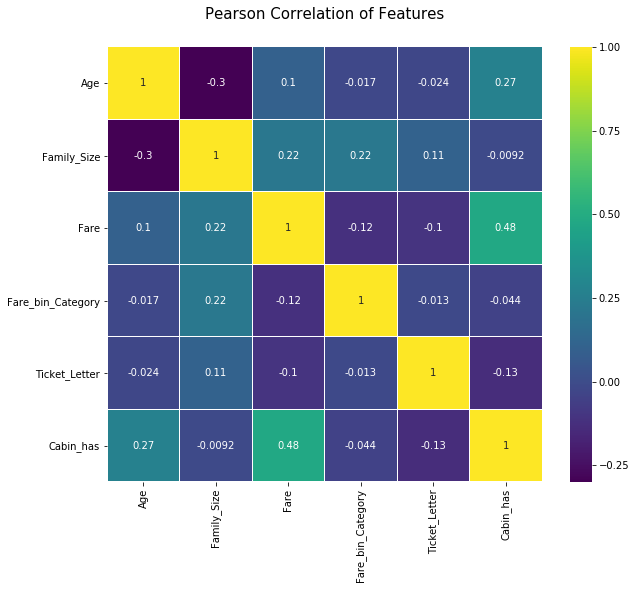

In [77]:
Correlation = pd.DataFrame(new_datum[["Age","Family_Size_Category", 
                                      "Family_Size", "Fare", "Fare_bin_Category",
                                     "Name_Title",  "Ticket_Letter", "Cabin_has"]])
colormap = plt.cm.viridis
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

### 输入模型前的处理
1. 哑变量  
2. 标准化
3. 丢弃不用的变量  
4. 分开训练数据与测试数据

In [78]:
sex_dummies = pd.get_dummies(combine_train_test["Sex"],prefix="Sex")
pclass_dummies = pd.get_dummies(combine_train_test["Pclass"],prefix="Pclass")
combine_train_test = pd.concat([combine_train_test, sex_dummies, pclass_dummies], axis=1)
embark_dummies = pd.get_dummies(combine_train_test["Embarked"], prefix="Embarked")
combine_train_test = pd.concat([combine_train_test, embark_dummies], axis=1)

In [79]:
scale_age_fare = preprocessing.StandardScaler().fit(combine_train_test[['Age','Fare', 'Name_length']])
combine_train_test[['Age','Fare', 'Name_length']] = scale_age_fare.transform(combine_train_test[['Age','Fare', 'Name_length']])

/home/huzhj/anaconda3/envs/kaggle/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/huzhj/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [80]:
combine_train_test_copy = combine_train_test.copy() 

In [81]:
combine_train_test.drop(columns=["Sex", "Name", "Name_Title", "PassengerId", "Embarked",
                                 "Ticket", "Cabin", "Parch", "SibSp",
                                "Family_Size_Category", "Fare_bin_Category"], 
                        inplace=True, axis=1)

In [82]:
train_df = combine_train_test[:891]
titanic_train_data_X = train_df.drop(["Survived"], axis=1)
titanic_train_data_Y = train_df.Survived
test_df = combine_train_test[891:]
titanic_test_data_X = test_df.drop(["Survived"], axis=1)

### 模型融合 （Model Ensemble）
#### (1) 利用不同的模型来对特征进行筛选，选出较为重要的特征：

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

def get_top_n_features(titanic_train_data_X, titanic_train_data_Y, top_n_features):

    # random forest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [20]}
    rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=25, cv=10, verbose=1)
    rf_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_rf = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': rf_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Features from RF Classifier')
    print(str(features_top_n_rf[:10]))

    # AdaBoost
    ada_est =AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=25, cv=10, verbose=1)
    ada_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature': list(titanic_train_data_X),
                                           'importance': ada_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Feature from Ada Classifier:')
    print(str(features_top_n_ada[:10]))

    # ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators': [500], 'min_samples_split': [3, 4], 'max_depth': [20]}
    et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=25, cv=10, verbose=1)
    et_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best ET Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': et_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    # GradientBoosting
    gb_est =GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1], 'max_depth': [20]}
    gb_grid = model_selection.GridSearchCV(gb_est, gb_param_grid, n_jobs=25, cv=10, verbose=1)
    gb_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature': list(titanic_train_data_X),
                                           'importance': gb_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split': [2, 4], 'max_depth': [20]}
    dt_grid = model_selection.GridSearchCV(dt_est, dt_param_grid, n_jobs=25, cv=10, verbose=1)
    dt_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': dt_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    # merge the three models
    features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et, features_top_n_gb, features_top_n_dt], 
                               ignore_index=True).drop_duplicates()
    
    features_importance = pd.concat([feature_imp_sorted_rf, feature_imp_sorted_ada, feature_imp_sorted_et, 
                                   feature_imp_sorted_gb, feature_imp_sorted_dt],ignore_index=True)
    
    return features_top_n , features_importance

feature_to_pick = 20
feature_top_n, feature_importance = get_top_n_features(titanic_train_data_X, titanic_train_data_Y, feature_to_pick)
titanic_train_data_X = pd.DataFrame(titanic_train_data_X[feature_top_n])
titanic_test_data_X = pd.DataFrame(titanic_test_data_X[feature_top_n])

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:  1.1min remaining:   36.5s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:  1.1min finished


Top N Features Best RF Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best RF Score:0.8237934904601572
Top N Features RF Train Score:0.9775533108866442
Sample 10 Features from RF Classifier
21        Name_length
2                Fare
1                 Age
5       Name_Title_Mr
22              Sex_0
23              Sex_1
13      Ticket_Letter
9         Family_Size
0              Pclass
4     Name_Title_Miss
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    7.8s remaining:    4.2s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   10.4s finished


Top N Features Best Ada Params:{'learning_rate': 0.01, 'n_estimators': 500}
Top N Features Best Ada Score:0.8159371492704826
Top N Features Ada Train Score:0.8204264870931538
Sample 10 Feature from Ada Classifier:
5                  Name_Title_Mr
2                           Fare
10    Family_Size_Category_Large
22                         Sex_0
9                    Family_Size
14                     Cabin_has
23                         Sex_1
26                      Pclass_3
0                         Pclass
21                   Name_length
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    7.2s remaining:    3.9s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    8.2s finished


Top N Features Best ET Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best ET Score:0.8181818181818182
Top N Features ET Train Score:0.9865319865319865
Sample 10 Features from ET Classifier:
5       Name_Title_Mr
21        Name_length
22              Sex_0
1                 Age
2                Fare
23              Sex_1
13      Ticket_Letter
4     Name_Title_Miss
14          Cabin_has
6      Name_Title_Mrs
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   33.3s remaining:   17.9s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   36.9s finished


Top N Features Best GB Params:{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500}
Top N Features Best GB Score:0.7744107744107744
Top N Features GB Train Score:0.9977553310886644
Sample 10 Feature from GB Classifier:
5                  Name_Title_Mr
2                           Fare
1                            Age
21                   Name_length
9                    Family_Size
10    Family_Size_Category_Large
7             Name_Title_Officer
19              Pclass3_Highfare
13                 Ticket_Letter
0                         Pclass
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.


Top N Features Best DT Params:{'max_depth': 20, 'min_samples_split': 4}
Top N Features Best DT Score:0.7654320987654321
Top N Features DT Train Score:0.9607182940516273
Sample 10 Features from DT Classifier:
5          Name_Title_Mr
2                   Fare
1                    Age
21           Name_length
9            Family_Size
19      Pclass3_Highfare
7     Name_Title_Officer
0                 Pclass
13         Ticket_Letter
14             Cabin_has
Name: feature, dtype: object


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    0.4s finished


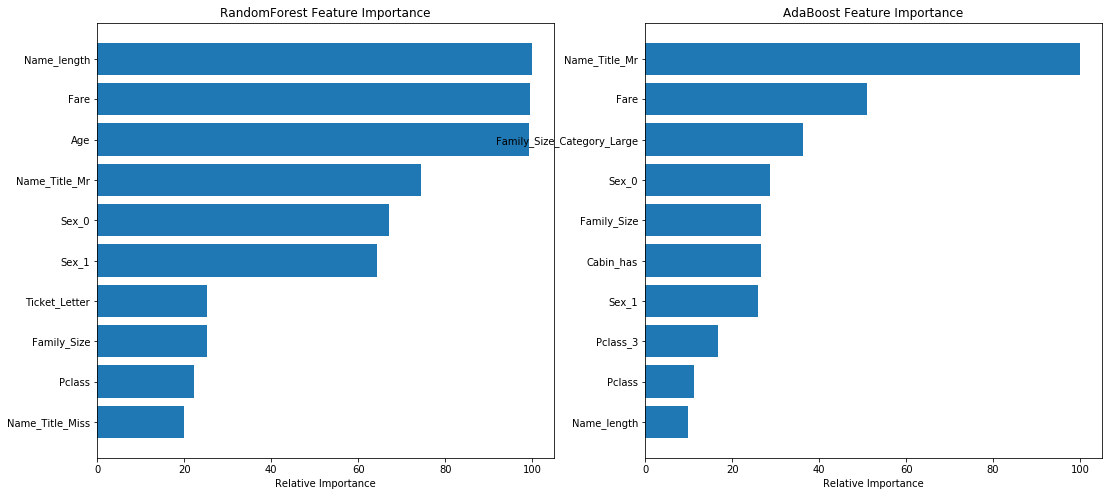

In [84]:
rf_feature_imp = feature_importance[:10]
Ada_feature_imp = feature_importance[30:30+10].reset_index(drop=True)

# make importances relative to max importance
rf_feature_importance = 100.0 * (rf_feature_imp['importance'] / rf_feature_imp['importance'].max())
Ada_feature_importance = 100.0 * (Ada_feature_imp['importance'] / Ada_feature_imp['importance'].max())

# Get the indexes of all features over the importance threshold
rf_important_idx = np.where(rf_feature_importance)[0]
Ada_important_idx = np.where(Ada_feature_importance)[0]

# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(rf_important_idx.shape[0]) + .5

plt.figure(1, figsize = (18, 8))

plt.subplot(121)
plt.barh(pos, rf_feature_importance[rf_important_idx][::-1])
plt.yticks(pos, rf_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('RandomForest Feature Importance')

plt.subplot(122)
plt.barh(pos, Ada_feature_importance[Ada_important_idx][::-1])
plt.yticks(pos, Ada_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('AdaBoost Feature Importance')

plt.show()

### (2) 常见的模型融合方法有：Bagging、Boosting、Stacking、Blending。

### (3-1): Bagging
Bagging 将多个模型，也就是多个基学习器的预测结果进行简单的加权平均或者投票。它的好处是可以并行地训练基学习器。Random Forest就用到了Bagging的思想。

### (3-2): Boosting
Boosting 的思想有点像知错能改，每个基学习器是在上一个基学习器学习的基础上，对上一个基学习器的错误进行弥补。我们将会用到的 AdaBoost，Gradient Boost 就用到了这种思想。

### (3-3): Stacking  
将训练好的所有基模型对整个训练集进行预测，第j个基模型对第i个训练样本的预测值将作为新的训练集中第i个样本的第j个特征值，最后基于新的训练集进行训练。同理，预测的过程也要先经过所有基模型的预测形成新的测试集，最后再对测试集进行预测.  
相比来说Stacking的融合框架相对前面的二者来说在精度上确实有一定的提升，所以在下面的模型融合上，我们也使用Stacking方法。
### 以上集成方法的区别与联系：  
https://blog.csdn.net/willduan1/article/details/73618677  
原文： http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/#stackingclassifier

(3-4): Blending
Blending 和 Stacking 很相似，但同时它可以防止信息泄露的问题。  
## Stacking框架融合:
这里我们使用了两层的模型融合，Level 1使用了：RandomForest、AdaBoost、ExtraTrees、GBDT、DecisionTree、KNN、SVM ，一共7个模型，Level 2使用了XGBoost使用第一层预测的结果作为特征对最终的结果进行预测。

### Level 1：
Stacking框架是堆叠使用基础分类器的预测作为对二级模型的训练的输入。 然而，我们不能简单地在全部训练数据上训练基本模型，产生预测，输出用于第二层的训练。如果我们在Train Data上训练，然后在Train Data上预测，就会造成过拟合。因此，我们需要对每个基学习器使用K-fold，将K个模型对Valid Set的预测结果拼起来，作为下一层学习器的输入。

所以这里我们建立输出fold预测方法：

In [85]:
from sklearn.model_selection import KFold
NFolds = 7
kf = KFold(n_splits = NFolds, random_state=0, shuffle=False)

def get_fold(clf, train_x, train_y, test_x):
    train = np.zeros((train_x.shape[0],))
    test = np.zeros((test_x.shape[0],))
    test_skf = np.empty((NFolds, test_x.shape[0]))
    
    for i, (train_idx, test_idx) in enumerate(kf.split(train_x)):
        tr_x = train_x[train_idx]
        tr_y = train_y[train_idx]
        ts_x = train_x[test_idx]
        
        clf.fit(tr_x, tr_y)
        train[test_idx] = clf.predict(ts_x)
        test_skf[i,:] = clf.predict(test_x)
    test = np.mean(test_skf, axis=1)
    return train.reshape(-1,1), test.reshape(-1,1)

构建不同的基学习器，这里我们使用了RandomForest、AdaBoost、ExtraTrees、GBDT、DecisionTree、KNN、SVM 七个基学习器：（这里的模型可以使用如上面的GridSearch方法对模型的超参数进行搜索选择）

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
rf_clf = RandomForestClassifier(n_estimators=500, max_features='sqrt')
ada_clf = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
ext_clf = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, max_depth=6)
gbdt_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05)
dt_clf = DecisionTreeClassifier(max_depth=8)
knn_clf = KNeighborsClassifier(n_neighbors=5)
svm_clf = SVC(kernel='linear', C=0.02)

train_x = titanic_train_data_X.values #pandas 变为 numpy
train_y = titanic_train_data_Y.values
test_x = titanic_test_data_X

In [87]:
rf_stack_train, rf_stack_test = get_fold(rf_clf, train_x, train_y, test_x)
ada_stack_train, ada_stack_test = get_fold(ada_clf, train_x, train_y, test_x)
ext_stack_train, ext_stack_test = get_fold(ext_clf, train_x, train_y, test_x)
gbdt_stack_train, gbdt_stack_test = get_fold(gbdt_clf, train_x, train_y, test_x)
dt_stack_train, dt_stack_test = get_fold(dt_clf, train_x, train_y, test_x)
knn_stack_train, knn_stack_test = get_fold(knn_clf, train_x, train_y, test_x)
svm_stack_train, svm_stack_test = get_fold(svm_clf, train_x, train_y, test_x)

### Level 2：我们利用XGBoost，使用第一层预测的结果作为特征对最终的结果进行预测。

In [88]:
X_train = np.concatenate((rf_stack_train, ada_stack_train, ext_stack_train, gbdt_stack_train, dt_stack_train,
                         dt_stack_train, knn_stack_train, svm_stack_train), axis=1)
X_test = np.concatenate((rf_stack_test, ada_stack_test, ext_stack_test, gbdt_stack_test, dt_stack_test,
                        dt_stack_test, knn_stack_test, svm_stack_test), axis=1)

In [89]:
from xgboost import XGBClassifier
gbm = XGBClassifier(n_estimators=2000, max_depth=4, min_child_weight=2, gamma=0.9, subsample=0.8,
                   colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(X_train, train_y)
predict = gbm.predict(X_test)

In [91]:
final = pd.DataFrame({'PassengerId':test_datum['PassengerId'].values, 
                       'Survived':df_survived.astype(np.int32)})
final.to_csv("final.csv", index=False)